## Linear Regression

In [1]:
import numpy as np
import pandas as pd
import time
import statsmodels.api as sm
from sklearn import linear_model
from itertools import combinations
from scipy.linalg import svd as svd
from matplotlib import pyplot as plt

In [10]:
def ols(X, y):
    """
    Solves for the least squares estimator.
    Adds a column of 1s to X.
    Parameters:
        X: n x d numpyarray
        y: n x 1 numpyarray
    Returns:
        beta: d x 1 numpyarray
    """
    if len(X.shape) == 1:
        # if X is 1D
        X = X.reshape((X.shape[0], 1))
        
    X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
    B = np.linalg.inv(X.T@X)@X.T@y
    
    return B
    

In [11]:
n = 100
X = np.arange(100)
eps = np.random.uniform(-10, 10, size=(100,))
y = .3*X + 3 + eps

m, b = ols(X,y)

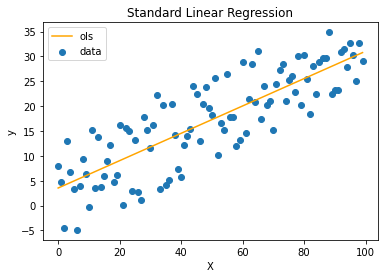

In [12]:
plt.scatter(X, y, label='data')
plt.plot(m*X+b, color='orange', label='ols')
plt.title('Standard Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [5]:
def svd_ols(X, y):
    """
    Solves for the least squares estimator using the SVD.
    Add a column of 1s to X.
    Parameters:
        X: n x d numpyarray
        y: n x 1 numpyarray
    Returns:
        beta: d x 1 numpy array
    """
    if len(X.shape) == 1:
        # if X is 1D
        X = X.reshape((X.shape[0], 1))
    
    # adding columns of ones
    X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
    u, s, vh = svd(X, full_matrices=False)
    B = vh.T@np.linalg.inv(np.diag(s))@u.T@y
    
    return B

In [6]:
x = np.linspace(-4, 2, 500)
y = x**3 + 3*x**2 - x - 3.5
eps = np.random.normal(0, 3, len(y))   # creates noise
y += eps                               # adds noise to randomize data
X = np.column_stack((x**3, x**2, x))

m3, m2, m1, b = svd_ols(X, y)

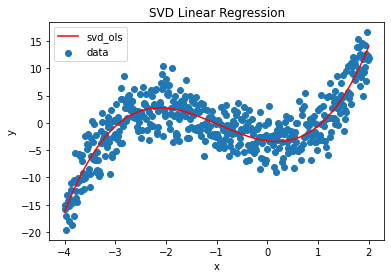

In [8]:
plt.scatter(x, y, label='data')
plt.plot(x, m3*x**3+m2*x**2+m1*x+b, color='red', label='svd_ols')
plt.xlabel('x')
plt.ylabel('y')
plt.title('SVD Linear Regression')
plt.legend()
plt.show()

In [13]:
data = pd.read_csv('realestate.csv')
x_vals = list(data.columns[:-1])
y = data['Y house price of unit area']
max_rsq = 0
max_col_vals = ''

for i in range(5):
    combos = list(combinations(x_vals, i))
    for cols in combos:
        temp_X = data[list(cols)]
        X = sm.add_constant(temp_X)
        model = sm.OLS(y, X).fit()
        r_val = model.rsquared

        if r_val > max_rsq:
            max_rsq = r_val
            max_col_vals = list(cols)

times = []

X = data[max_col_vals]
st = time.time()
ols(X, y)
times.append(time.time() - st)

st = time.time()
svd_ols(X, y)
times.append(time.time() - st)

st = time.time()
sm.OLS(y, X).fit()
times.append(time.time() - st)

In [14]:
max_rsq

0.5711351969713669

In [15]:
max_col_vals

['X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude']

In [16]:
x_vals = ['X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude']

max_bic = 1e10
max_bic_col_vals = ''

max_aic = 1e10
max_aic_col_vals = ''

for i in range(5):
    combos = list(combinations(x_vals, i))
    for cols in combos:
        temp_X = data[list(cols)]
        X = sm.add_constant(temp_X)
        model = sm.OLS(y, X).fit()
        aic_val = model.aic
        bic_val = model.bic

        if aic_val < max_aic:
            max_aic = aic_val
            max_aic_col_vals = list(cols)

        if bic_val < max_bic:
            max_bic = bic_val
            max_bic_col_vals = list(cols)

In [18]:
max_aic_col_vals

['X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude']

In [19]:
max_bic_col_vals

['X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude']

In [20]:
# using cross validation to test for best alpha parameter
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X, y)
reg.alpha_

0.001

In [21]:
model = linear_model.RidgeCV(alphas=reg.alpha_)
ridge_score = model.fit(X, y).score(X, y)

In [24]:
reg = linear_model.LassoCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X,y)
reg.alpha_

0.0001

In [ ]:
model = linear_model.RidgeCV(alphas=reg.alpha_)
lasso_score = model.fit(X, y).score(X, y)

In [23]:
print(ridge_score, lasso_score)

0.5822873626498093 0.5823014235191197
